In [2]:
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_rows', 234)

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
import sklearn
import itertools
# import jellyfish
from deep_translator import GoogleTranslator

# from nltk.metrics import diastance
# import Pycluster as PC

import requests
import bs4
from bs4 import BeautifulSoup
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("data_combined_final.csv", index_col=0).reset_index(drop=True)

In [3]:
df.columns

Index(['id', 'post_date', 'title', 'title_final', 'sub_group', 'group',
       'salary', 'skill', 'description', 'requirement', 'benefit', 'location',
       'level', 'year_experience', 'employer', 'employer_domain', 'url',
       'portal', 'employer_scale', 'country'],
      dtype='object')

# Benefit_Vinh

In [4]:
df['benefit'] = df['benefit'].astype(str)

In [5]:
df['benefit_length'] = df['benefit'].apply(lambda x: len(x))
df['benefit_length'].describe()

count     631.000000
mean      372.299525
std       402.132901
min         3.000000
25%         3.000000
50%       258.000000
75%       581.000000
max      2351.000000
Name: benefit_length, dtype: float64

In [6]:
# what are benefit with length of 3
df_ben_10= df.loc[df['benefit_length'] > 10].sort_values(by='benefit_length')

In [7]:
df_ben_10.shape

(464, 21)

Qualified contents whose length are from 10 upwards.

In [8]:
# detect language of token
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0

def language_detect(content):
    try:
        return detect(content)
    except:
        return None

df_ben_10['benefit_lang'] = df_ben_10['benefit'].apply(lambda x: language_detect(x))
df_ben_10['benefit_lang'].value_counts()

benefit_lang
vi    259
en    203
ja      2
Name: count, dtype: int64

In [9]:
## Step 1: Translate all contents into english
_translate = []
df_ben_10 = df_ben_10.reset_index()
for i in range(len(df_ben_10)):
    try:
      tran = GoogleTranslator(source='auto', target='en').translate(df_ben_10['benefit'][i])
      _translate.append(tran)
    except:
      _translate.append(df_ben_10['benefit'][i])
df_ben_10['benefit_translated'] = _translate

# JD

In [10]:
df['description'] = df['description'].astype(str)

In [11]:
df['description_length'] = df['description'].apply(lambda x: len(x))
df['description_length'].describe()

count     631.000000
mean     1115.337559
std      1015.102268
min         3.000000
25%       512.000000
50%       807.000000
75%      1380.000000
max      6649.000000
Name: description_length, dtype: float64

In [12]:
# what are benefit with length of 3
df.loc[df['description_length'] <= 10].sort_values(by='description_length')

id   post_date  \
144         TopCV_1838  2023-03-22   
575         joboko_433         NaN   
564         joboko_414         NaN   
562         joboko_410         NaN   
507                NaN         NaN   
497  careerbuilder_254         NaN   
481  careerbuilder_229         NaN   
475         ITViec_215         NaN   
463         ITViec_194         NaN   
578         joboko_438         NaN   
462         ITViec_193         NaN   
450         ITViec_175         NaN   
373    vietnamworks_97         NaN   
372    vietnamworks_96         NaN   
371    vietnamworks_95         NaN   
352    vietnamworks_76         NaN   
351    vietnamworks_75         NaN   
350    vietnamworks_74         NaN   
349    vietnamworks_73         NaN   
169         TopCV_1863  2023-03-08   
451         ITViec_176         NaN   
591         joboko_468         NaN   
487  careerbuilder_235         NaN   
499  careerbuilder_256         NaN   

                                                 title            title_final  \
144  Kế Toán/Kiểm Toán Làm Chuyên Viên Phân Tích Ng...       business analyst   
575  [HN/ HCM] Công Ty Trang Sức Jemmia Tuyển Dụng ...                    NaN   
564                               Data Engineer Leader                    NaN   
562                      Kỹ sư dữ liệu (Data Engineer)                    NaN   
507                  Business Analyst Leader (Fintech)                    NaN   
497     Business Analyst Leader tại Hà Nội (BA leader)                    NaN   
481                                   Business Analyst                    NaN   
475                         DATA Analyst (Python, SQL)                    NaN   
463           Lead Data Engineer (AWS, Hybrid Working)                    NaN   
578                                       Data Analyst                    NaN   
462      Senior Data Engineer - 13T LƯƠNG - UPTO 2500$                    NaN   
450   Business Analyst (Japanese) – Salary Up to $2000                    NaN   
373  [HCM - Hybrid][Up to $4800] AWS Cloud Data Eng...                    NaN   
372  Data Engineer/ Data Expert [ Banking ] ✅ Up to...                    NaN   
371                             Nhân Viên Data Analyst                    NaN   
352  Chuyên Viên Phân Tích Nghiệp Vụ (Senior Busine...                    NaN   
351                        Business Analyst (Upto 25M)                    NaN   
350  Data Analyst Expert / Business Intelligence Ma...                    NaN   
349  Business Credit Analyst ( Experience in Auditi...                    NaN   
169                         Business Intelligence (BI)  business intelligence   
451                            Senior Business Analyst                    NaN   
591    [HN] Fresher/Junior Data Analyst (Data Quality)                    NaN   
487                   Business Analyst (Product Owner)                    NaN   
499                   Business Analyst (Product Owner)                    NaN   

    sub_group group                                          salary  \
144        BA  data                                    Tới 25 triệu   
575        DE  data  Lương: Từ 10 Triệu - Dưới 15 Triệu VNĐ / Tháng   
564        DE  data                           Lương: up to 1800 USD   
562        DE  data                         Lương: Lên đến 25 triệu   
507        BA  data                                 Up to 2.300 USD   
497        BA  data                        Lương: 15 Tr - 18 Tr VND   
481        BA  data                        Lương: 22 Tr - 30 Tr VND   
475     DA/BI  data                               1,000 - 1,500 USD   
463        DE  data                               3,000 - 3,500 USD   
578     DA/BI  data                      Lương: 12 triệu - 20 triệu   
462        DE  data                               1,500 - 2,500 USD   
450        BA  data                                     up to $2000   
373        DE  data                                       Tới $4800   
372        DE  data                              

Qualified contents whose length are from 10 upwards.

In [13]:
# detect language of token
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0

def language_detect(content):
    try:
        return detect(content)
    except:
        return None

df['description_lang'] = df['description'].apply(lambda x: language_detect(x))
df['description_lang'].value_counts()

description_lang
en    304
vi    300
tl     22
de      3
ja      2
Name: count, dtype: int64

In [14]:
vn_df = df[df['description_lang'] == 'vi'].reset_index()

In [15]:
## Step 1: Translate all contents into english
_translate = []
for i in range(len(vn_df)):
    tran = GoogleTranslator(source='auto', target='en').translate(vn_df['description'][i])
    _translate.append(tran)
vn_df['description_translated'] = _translate

In [19]:
vn_df

index           id   post_date  \
0        0  Glints_1694  2023-02-15   
1        1  Glints_1695  2023-03-23   
2        2  Glints_1696  2023-03-22   
3        3  Glints_1697  2023-03-10   
4        4  Glints_1698  2023-03-22   
..     ...          ...         ...   
295    573   joboko_426         NaN   
296    580   joboko_447         NaN   
297    586   joboko_461         NaN   
298    588   joboko_465         NaN   
299    592   joboko_470         NaN   

                                                 title       title_final  \
0    Chuyên Viên Phân Tích/ Thống Kê (Senior Data A...      data analyst   
1                                    BUSINESS ANALYST   business analyst   
2                                     Business Analyst  business analyst   
3                                     Business Analyst  business analyst   
4                                     Business Analyst  business analyst   
..                                                 ...               ...   
295              Data Engineer - 13T LUONG - UPTO 2500               NaN   
296                          Machine Learning Engineer               NaN   
297              Chuyên Viên Data Analyst (Phòng Sale)               NaN   
298                                       Data Analyst               NaN   
299                             Nhân Viên Data Analyst               NaN   

    sub_group group                      salary  \
0       DA/BI  data         18000000 - None VND   
1          BA  data               100 - 200 IDR   
2          BA  data               100 - 200 IDR   
3          BA  data     10000000 - 27000000 VND   
4          BA  data              800 - 1500 SGD   
..        ...   ...                         ...   
295        DE  data          Lương: 1500 - 2500   
296  DS/ML/AI  data    Lương: 10 Tr - 25 Tr VND   
297     DA/BI  data  Lương: 10 triệu - 13 triệu   
298     DA/BI  data    Lương: 15 Tr - 25 Tr VND   
299     DA/BI  data        Lương: 15 - 20 triệu   

                                                 skill  \
0     business data analyst, data analyst, data ana...   
1             business analyst, perfomance testing,emr   
2                              nan,nan,nan,nan,english   
3                  writing skills,logical thinking,nan   
4     good communication skills, quality control,da...   
..                                                 ...   
295  thác Data warehouse, Data lake● Xây dựng và vậ...   
296                                                NaN   
297                                                NaN   
298  nghiệp vụ lên đề xuất giải pháp cho bài toán p...   
299  Visualize để chuyển hoá dữ liệu thành Graphics...   

                                           description  ... employer  \
0    Chi tiết công việc Chuyên Viên Phân Tích/ Thốn...  ...      NaN   
1    Chi tiết công việc BUSINESS ANALYST  tại Công ...  ...      NaN   
2    Chi tiết công việc Business Analyst tại CÔNG T...  ...      NaN   
3    Chi tiết công việc Business Analyst tại Med247...  ...      NaN   
4    Chi tiết công việc Business Analyst tại Công t...  ...      NaN   
..                                                 ...  ...      ...   
295  ['Top 3 Reasons To Join Us', '', 'Mức thu nhập...  ...      NaN   
296  ['Mô tả Công việc', '', '- Lập trình ứng dụng ...  ...      NaN   
297  ['1. Quản trị nghiệp vụ bán hàng, quản lý số l...  ...      NaN   
298  ['Mô tả Công việc', '', 'MÔ TẢ CÔNG VIỆC', '',...  ...      NaN   
299  ['Thu thập dữ liệu từ các nguồn tin tức và mạn...  ...      NaN   

                         employer_domain  \
0                      apparel & fashion   
1                 hospital & health care   
2                                     in   
3                       medical practice   
4    information technology and services   
..                                   ...   
295                                  NaN   
296                                  NaN   
297                                  NaN   
298     

In [20]:
jd_df = df[['index','description','requirement','benefit']].merge(vn_df[['index','description','requirement','benefit','description_translated']],on=['description','requirement','benefit','index'],how='left')
jd_df['final_jd_translated'] = np.where(jd_df['description_translated'].isnull(),jd_df['description'],jd_df['description_translated'])
jd_df

KeyError: "['index'] not in index"

In [ ]:
# translate: VINH WILL DO
from translate import Translator
translator= Translator(from_lang="vi", to_lang="en")

bnf_df = jd_df.loc[jd_df['benefit_lang'].isin(['vi', 'en'])]
bnf_df['benefit_translated'] = bnf_df.apply(lambda x: translator.translate(x['benefit']) if x['benefit_lang'] == 'vi' else x['benefit'], axis = 1)

In [ ]:
ex = bnf_df.loc[bnf_df['benefit_lang'] == 'vi']['benefit'][4]
translator.translate(ex)

In [ ]:
"Benefit and PerksSalary & Allowances Competitive income, lunch allowance, 13 fixed months salary, performance bonus and gift on special occasion."

# Benefits Separated sentences

In [21]:
import nltk
from nltk.corpus import stopwords
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')
nltk.download('all')

[nltk_data] Downloading package stopwords to /Users/vinh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /Users/vinh/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/vinh/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/vinh/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/vinh/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/vinh/nltk_data...
[nltk_da

True

In [22]:
bnf_df_1 = df_ben_10

In [23]:
# check an example
def createBoW(text):
    text = text.lower()
    for p in string.punctuation:
        text = text.replace(p, "")

    text = text.split(" ")
    new_text = [word for word in text if word not in stopwords.words('english')]
    line = ' '.join([i for i in new_text])
    return line

bnf_df_1['benefit_translated_ad'] = bnf_df_1['benefit_translated'].apply(lambda x: createBoW(x))

In [24]:
from nltk.tokenize import sent_tokenize, word_tokenize

# # cleaning
bnf_df_1['benefit_translated_ad'] = bnf_df_1['benefit_translated_ad'].apply(lambda x: str(x))
bnf_df_1['benefit_translated_ad'] = bnf_df_1['benefit_translated_ad'].apply(lambda x: x.replace(";", "."))
# df['benefit_translated'] = df['benefit_translated'].apply(lambda x: x.replace("-", "."))

# tokenize
bnf_df_1['benefit_sent_tokens'] = bnf_df_1['benefit_translated_ad'].apply(lambda x: sent_tokenize(x, language='english'))
data = list(itertools.chain(*bnf_df_1['benefit_sent_tokens'].tolist()))
token_df = pd.DataFrame({'sent_token': data})

In [ ]:
bnf_df_1['num_tokens'] = bnf_df_1['benefit_sent_tokens'].apply(lambda x: len(x))
bnf_df_1['num_tokens'].describe()

In [25]:
def count_length_token(tokens):
    length = []
    for token in tokens:
        res = token.count(" ")+1
        length.append(res)
    return length

bnf_df_1['token_length'] = bnf_df_1['benefit_sent_tokens'].apply(lambda x: count_length_token(x))

In [26]:
def detach_by_comma(row):
  final_list = []
  for i in row:
    if i.count(" ")+1 > 5:
      text = i.split(',')
      final_list.extend(text)
    elif len(i) < 2:
      continue
    else: final_list.append(i)
  return final_list
bnf_df_1['benefits_sent_tokens_v2'] = bnf_df_1['benefit_sent_tokens'].apply(lambda x: detach_by_comma(x))
bnf_df_1['token_length_v2'] = bnf_df_1['benefits_sent_tokens_v2'].apply(lambda x: count_length_token(x))
bnf_df_1['num_tokens_v2'] = bnf_df_1['benefits_sent_tokens_v2'].apply(lambda x: len(x))

In [27]:
def detach_by_dash(row):
  final_list = []
  for i in row:
    if i.count(" ")+1 > 5:
      text = i.split('-')
      final_list.extend(text)
    else: final_list.append(i)
  return final_list
bnf_df_1['benefits_sent_tokens_v3'] = bnf_df_1['benefits_sent_tokens_v2'].apply(lambda x: detach_by_dash(x))
bnf_df_1['token_length_v3'] = bnf_df_1['benefits_sent_tokens_v3'].apply(lambda x: count_length_token(x))
bnf_df_1['num_tokens_v3'] = bnf_df_1['benefits_sent_tokens_v3'].apply(lambda x: len(x))

In [28]:
def detach_by_line_down(row):
  final_list = []
  for i in row:
    if i.count(" ")+1 > 5:
      text = i.split('\n')
      final_list.extend(text)
    else: final_list.append(i)
  return final_list
bnf_df_1['benefits_sent_tokens_v4'] = bnf_df_1['benefits_sent_tokens_v3'].apply(lambda x: detach_by_line_down(x))
bnf_df_1['token_length_v4'] = bnf_df_1['benefits_sent_tokens_v4'].apply(lambda x: count_length_token(x))
bnf_df_1['num_tokens_v4'] = bnf_df_1['benefits_sent_tokens_v4'].apply(lambda x: len(x))

In [29]:
def detach_by_big_dot(row):
  final_list = []
  for i in row:
    if i.count(" ")+1 > 5:
      text = i.split('●')
      final_list.extend(text)
    else: final_list.append(i)
  return final_list
bnf_df_1['benefits_sent_tokens_v5'] = bnf_df_1['benefits_sent_tokens_v4'].apply(lambda x: detach_by_big_dot(x))
bnf_df_1['token_length_v5'] = bnf_df_1['benefits_sent_tokens_v5'].apply(lambda x: count_length_token(x))
bnf_df_1['num_tokens_v5'] = bnf_df_1['benefits_sent_tokens_v5'].apply(lambda x: len(x))

In [30]:
def detach_by_big_dot(row):
  final_list = []
  for i in row:
    if i.count(" ")+1 > 5:
      text = i.split('▪')
      final_list.extend(text)
    elif len(i) < 4:
      continue
    else: final_list.append(i)
  return final_list
bnf_df_1['benefits_sent_tokens_v6'] = bnf_df_1['benefits_sent_tokens_v5'].apply(lambda x: detach_by_big_dot(x))
bnf_df_1['token_length_v6'] = bnf_df_1['benefits_sent_tokens_v6'].apply(lambda x: count_length_token(x))
bnf_df_1['num_tokens_v6'] = bnf_df_1['benefits_sent_tokens_v6'].apply(lambda x: len(x))

In [31]:
def lemmatize_text(text):
  w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
  lemmatizer = nltk.stem.WordNetLemmatizer()
  remove_line = [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
  line = ' '.join([i for i in remove_line])
  return line

In [32]:
bnf_df_1['benefits_sent_tokens_v7'] = np.nan
for i in range(len(bnf_df_1['benefits_sent_tokens_v7'])):
  sentence_list = []
  for n in bnf_df_1['benefits_sent_tokens_v6'][i]:
    for p in string.punctuation:
        n = n.replace(p, "")
    lemmentized_sentence = lemmatize_text(n)
    sentence_list.append(lemmentized_sentence)
  bnf_df_1['benefits_sent_tokens_v7'][i] = sentence_list

In [33]:
# print(len(bnf_df_1[bnf_df_1['num_tokens'] != bnf_df_1['num_tokens_v2']]))
print(len(bnf_df_1[bnf_df_1['num_tokens_v2'] != bnf_df_1['num_tokens_v3']]))
print(len(bnf_df_1[bnf_df_1['num_tokens_v3'] != bnf_df_1['num_tokens_v4']]))
print(len(bnf_df_1[bnf_df_1['num_tokens_v4'] != bnf_df_1['num_tokens_v5']]))
print(len(bnf_df_1[bnf_df_1['num_tokens_v5'] != bnf_df_1['num_tokens_v6']]))

280
21
10
182


In [34]:
# the_data = single_sentence_df['benefits_sent_tokens_v6']\
# .apply(pd.Series)\
# .reset_index()\
# .melt(id_vars='index')\
# .dropna()[['index', 'value']]\
# .set_index('index')\
# .reset_index()
# the_data['word_count'] = the_data['value'].apply(lambda x: x.count(" ")+1)
# the_data[the_data['word_count'] < 5].value_counts().to_frame()

# Categorized Manually

In [35]:
class_encoding = {
    'Paid time off': 'F1',
    'Discounts/rewards/bonuses': 'F2',
    'Tuition reimbursement': 'E1',
    'Growth plan': 'E2',
    'Training': 'E3',
    'Insurance': 'W1',
    'Daily wellness': 'W2',
    'Appreciation programs': 'R1',
    'Company parties/trips': 'R2',
    'Flexible schedule': 'R3',
    'Family planning services': 'C1',
    'Child care assistance': 'C2',
    'Working equipment': 'I1',
    'Working place': 'I2'
}

class_dict = pd.DataFrame({'benefit': list(class_encoding.keys()), 'code': list(class_encoding.values()) })
class_dict.loc[class_dict['code'].str.contains("F"), 'benefit_group'] = 'Finance'
class_dict.loc[class_dict['code'].str.contains("E"), 'benefit_group'] = 'Education'
class_dict.loc[class_dict['code'].str.contains("W"), 'benefit_group'] = 'Wellness'
class_dict.loc[class_dict['code'].str.contains("R"), 'benefit_group'] = 'Recognition'
class_dict.loc[class_dict['code'].str.contains("C"), 'benefit_group'] = 'Family Care'
class_dict.loc[class_dict['code'].str.contains("I"), 'benefit_group'] = 'Infrastructure'
class_dict

benefit code   benefit_group
0               Paid time off   F1         Finance
1   Discounts/rewards/bonuses   F2         Finance
2       Tuition reimbursement   E1       Education
3                 Growth plan   E2       Education
4                    Training   E3       Education
5                   Insurance   W1        Wellness
6              Daily wellness   W2        Wellness
7       Appreciation programs   R1     Recognition
8       Company parties/trips   R2     Recognition
9           Flexible schedule   R3     Recognition
10   Family planning services   C1     Family Care
11      Child care assistance   C2     Family Care
12          Working equipment   I1  Infrastructure
13              Working place   I2  Infrastructure

In [36]:
class_label = {class_dict.iloc[i]['code']: [] for i in range(0, len(class_dict))}

def append_label(original_label: dict, appended_label: dict):
    updated_label = original_label

    # append new label
    for k, v in appended_label.items():
        try:
            if type(v) is list:
                updated_label[k] = updated_label[k] + v
            else:
                updated_label[k] = updated_label[k] + [v]
        except:
            print("There is no class called", k)

    # drop duplicates
    for k, v in updated_label.items():
        updated_label[k] = pd.Series(v).unique().tolist()

    return updated_label

Categorize benefits: https://www.betterup.com/blog/best-job-benefits (reference)
* Financial benefits:
    * Paid time off
    * Discounts/rewards/bonuses
* Education and career planning benefits:
    * Tuition reimbursement
    * Growth plan
    * Training
* Wellness benefits
    * Insurance
    * Daily wellness (free tea, coffee, snack,...)
* Recognition benefits
    * Appreciation programs
    * Company parties/trips
    * Flexible schedule: optional session in a day, work-from-home, hybrid,...
* Infrastructure:
    * Working equipment
    * Working place
* Family care benefits
    * Family planning services
    * Child care assistance

In [37]:
label_ver1 = append_label(class_label, {
                'F1': ['holiday', 'leave', 'days off','inpatient',
                       'outpatient','tet','sickness','new year','maternity','wedding'
                       ,'marriage','lucky money','support personal loan','paternity'],

                'F2': ['salary increase', 'bonus', 'discount',
                       'allowance','13th','t14','14 month','15 month','15th','16 month salary','awarded','compensation','reward','award'],

                'E1': ['course','classes','account','library'],

                'E2': ['review', 'growth', 'career', 'promotion','self-determined','advancement','advancement'],

                'E3': ['training', 'learning', 'seminar', 'workshop','trained','development',
                       'personal development','skill development','orientation','improvement',
                       'support self-development','instructor','improve individual skill'],

                'W1': ['insurance','social insurance', 'health check', 'health insurance',
                       'unemployement', 'health care insurance' , 'medical','pvi care','health talk'],

                'W2': ['food', 'beverage', 'coffee', ' tea ', 'snack','entertainment','happy time','club',
                       'game', 'milktea', 'esport','football','lunch','breakfast','badminton','happy time',
                       'fruit','pantry','swimming','yoga','refreshment','happy hour','drink','pingpong','table tennis',
                       'happy meal','basketball','volleyball','gift','wellness','phone bill','phone sim'],

                'R1': ['appreciation', 'recognization','evaluation','assessment'],

                'R2': ['travel', 'trip', 'party', 'birthday','parties','christmas','picnic',
                       'team building', 'team-building', 'teambuilding', "women's day",
                       'retreat', 'tourism','vacation','color fest','festival','yearend',
                       'year anniversary','festival','founding day','event','bonding','welfare'],

                'R3': ['hybrid','flexible time','work home','remote'],

                'C1': ['family',"happy mom's"],

                'C2': ['childbirth celebration','child'],

                'I1': ['equipment', 'device', 'computer', 'laptop','macbook','access','shuttle bus'],

                'I2': ['facility','gym','yoga center','dormitory support','fitness','playground']
                })
label_ver1

{'F1': ['holiday',
  'leave',
  'days off',
  'inpatient',
  'outpatient',
  'tet',
  'sickness',
  'new year',
  'maternity',
  'wedding',
  'marriage',
  'lucky money',
  'support personal loan',
  'paternity'],
 'F2': ['salary increase',
  'bonus',
  'discount',
  'allowance',
  '13th',
  't14',
  '14 month',
  '15 month',
  '15th',
  '16 month salary',
  'awarded',
  'compensation',
  'reward',
  'award'],
 'E1': ['course', 'classes', 'account', 'library'],
 'E2': ['review',
  'growth',
  'career',
  'promotion',
  'self-determined',
  'advancement'],
 'E3': ['training',
  'learning',
  'seminar',
  'workshop',
  'trained',
  'development',
  'personal development',
  'skill development',
  'orientation',
  'improvement',
  'support self-development',
  'instructor',
  'improve individual skill'],
 'W1': ['insurance',
  'social insurance',
  'health check',
  'health insurance',
  'unemployement',
  'health care insurance',
  'medical',
  'pvi care',
  'health talk'],
 'W2': ['food

In [38]:
def classify_benefit(text, class_dict):
    output = {}
    for code, vals in class_dict.items():
        vals_found = []
        for v in vals:
            if v in text:
                vals_found.append(v)
        if len(vals_found) > 0:
            output[code] = vals_found
    if len(output) > 0:
        return output
    else:
        return None

In [39]:
def replace_all(text, dic):
    """
    This function replace words in key by their values in the dictionary
    text: sentence to translate
    dic: dictionary of keywords need to be replaced and their replaced words
    """
    for i, j in dic.items():
        text = text.replace(i, j)
    return text

In [40]:
categorized_df = bnf_df_1[['id','benefits_sent_tokens_v7']]

In [41]:
change_list = {'[':"",
               ']':'',
               "'":''}
categorized_df.benefits_sent_tokens_v7 = categorized_df.benefits_sent_tokens_v7.apply(lambda x: str(x))
categorized_df.benefits_sent_tokens_v7 = categorized_df.benefits_sent_tokens_v7.apply(lambda x: replace_all(x,change_list))
categorized_df.benefits_sent_tokens_v7 = categorized_df.benefits_sent_tokens_v7.str.split(',')
categorized_df = categorized_df.explode('benefits_sent_tokens_v7')

In [42]:
categorized_df['benefits_sent_tokens_v7'] = categorized_df['benefits_sent_tokens_v7'].apply(lambda x: x.lower().strip())
categorized_df['class'] = categorized_df['benefits_sent_tokens_v7'].apply(lambda x: classify_benefit(x.lower(), label_ver1))
categorized_df.loc[~(categorized_df['class'].isna())]

id                            benefits_sent_tokens_v7  \
0    VietnamWork_1940                                3 5 month bonusyear   
1    VietnamWork_1944              bao viet premium healthcare insurance   
2     vietnamworks_86                      benefit you 13th month salary   
3    vietnamworks_101                      benefit you 13th month salary   
4    VietnamWork_1966                  annual bonus upto 18 month salary   
..                ...                                                ...   
463        joboko_365                 training course state bank vietnam   
463        joboko_365  reputable training organization improve profes...   
463        joboko_365                              promotion opportunity   
463        joboko_365                       many development opportunity   
463        joboko_365                               promotion awaits you   

                                      class  
0                         {'F2': ['bonus']}  
1                     {'W1': ['insurance']}  
2                          {'F2': ['13th']}  
3                          {'F2': ['13th']}  
4                         {'F2': ['bonus']}  
..                                      ...  
463  {'E1': ['course'], 'E3': ['training']}  
463                    {'E3': ['training']}  
463                   {'E2': ['promotion']}  
463                 {'E3': ['development']}  
463                   {'E2': ['promotion']}  

[3509 rows x 3 columns]

In [43]:
categorized_df['new_class'] = np.where(categorized_df['class'].isnull(),{},categorized_df['class'])

In [44]:
class_data_df = categorized_df\
.groupby(['id'])\
.agg({'benefits_sent_tokens_v7': lambda x:  ",".join(sorted(pd.Series.unique(x))),
      'new_class':lambda x: {k:v for a in x for k, v in a.items()}})\
.reset_index()

In [ ]:
def merge_dicts(x):
    return {k: v for d in x.dropna() for k, v in d.items()}

final_category_df = categorized_df.groupby(['id'],as_index=False).agg({
    'benefits_sent_tokens_v7': lambda x: ",".join(sorted(pd.Series.unique(x))),
    'class': merge_dicts})

In [ ]:
final_category_df['benefit_group'] = final_category_df['class'].apply(lambda x: list(x.keys()))
final_category_df['benefit_subgroup'] = final_category_df['class'].apply(lambda x: list(x.values()))

In [ ]:
change_list = {'[':"",
               ']':'',
               "'":''}
final_category_df.benefit_group = final_category_df.benefit_group.apply(lambda x: str(x))
final_category_df.benefit_group = final_category_df.benefit_group.apply(lambda x: replace_all(x,change_list))
final_category_df['benefit_group'] = final_category_df['benefit_group'].str.split(',')
final_category_df = final_category_df.explode('benefit_group')

In [ ]:
final_category_df.benefit_subgroup = final_category_df.benefit_subgroup.apply(lambda x: str(x))
final_category_df.benefit_subgroup = final_category_df.benefit_subgroup.apply(lambda x: replace_all(x,change_list))
final_category_df['benefit_subgroup'] = final_category_df['benefit_subgroup'].str.split(',')
final_category_df = final_category_df.explode('benefit_subgroup')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


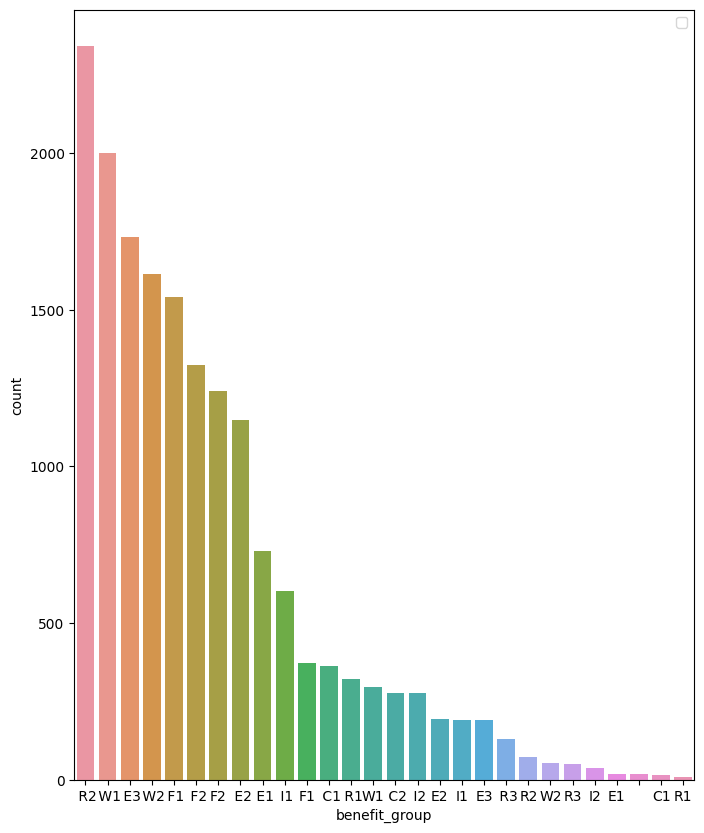

In [ ]:
from matplotlib.pyplot import cm

benefit_counting = final_category_df[['benefit_group']].value_counts().to_frame().reset_index()
plt.figure(figsize = (8,10))
sns.barplot(x='benefit_group',y='count',data= benefit_counting[benefit_counting['benefit_group'] != " "])
color=iter(cm.rainbow(np.linspace(0,1,len(class_encoding))))

# for key, c in zip(class_encoding, color):
#     for idx, item in enumerate(class_encoding[key]):
#         x = item[0]
#         y = item[1]
#         if idx == 0:
#             plt.scatter(x, y, c=c, label=key)
#         else:
#             plt.scatter(x, y, c=c)

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


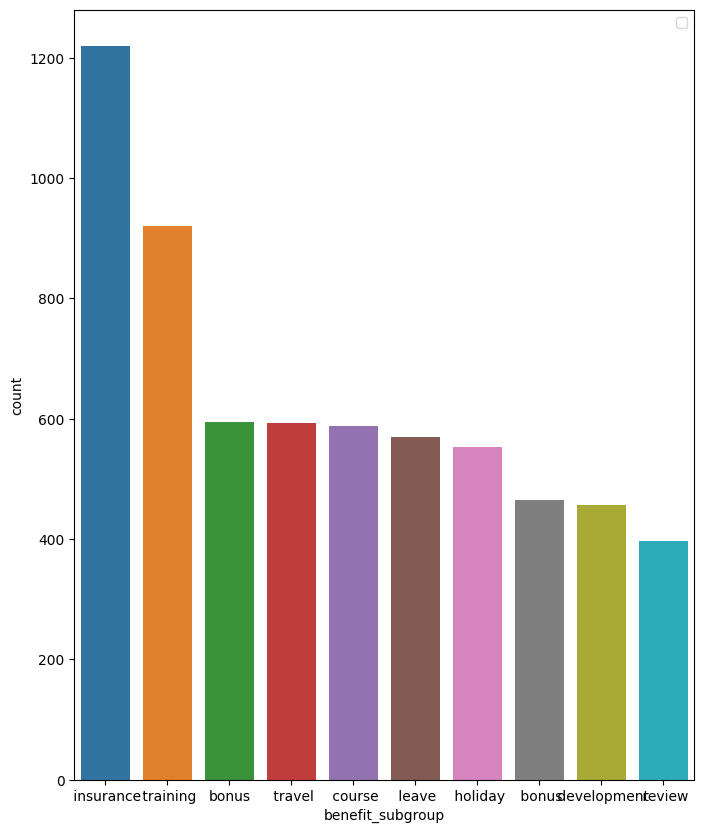

In [ ]:
from matplotlib.pyplot import cm

benefit_counting = final_category_df[['benefit_subgroup']].value_counts().to_frame().reset_index().head(10)
plt.figure(figsize = (8,10))
sns.barplot(x='benefit_subgroup',y='count',data= benefit_counting[benefit_counting['benefit_subgroup'] != " "])
color=iter(cm.rainbow(np.linspace(0,1,len(class_encoding))))

# for key, c in zip(class_encoding, color):
#     for idx, item in enumerate(class_encoding[key]):
#         x = item[0]
#         y = item[1]
#         if idx == 0:
#             plt.scatter(x, y, c=c, label=key)
#         else:
#             plt.scatter(x, y, c=c)

plt.legend()
plt.show()

# Salary processing

In [299]:
sal_df = df

In [300]:
# sal_df = sal_df[['id', 'post_date', 'title', 'title_final',
#        'sub_group', 'group', 'salary', 'skill', 'description', 'requirement',
#        'benefit', 'location', 'level', 'year_experience', 'employer',
#        'employer_domain', 'url', 'portal', 'employer_scale', 'country','new_class']]

In [301]:
def to_float(row):
  """ Convert data to float """
  if ',' in row:
       row = str(row).replace(',','.')
  if '.' in row:
      if len(re.findall("0", str(row).split('.')[1])) < 1:
        row = float(row)
      elif len(re.findall("0", str(row).split('.')[1])) >= 1:
        row = str(row).replace('.','')
        row = float(row)
  else: row = float(row)
  return row

In [302]:
def replace_all(text, dic):
    """
    This function replace words in key by their values in the dictionary
    text: sentence to translate
    dic: dictionary of keywords need to be replaced and their replaced words
    """
    for i, j in dic.items():
        text = text.replace(i, j)
    return text

In [303]:
def consistent(row,dic_to_change):
  """
  This function remove convert rows have any kind of"upto" word into "value - u"
  """
  ## Keyword to replace accordingly

  if ("from" in row) and ("-" not in row):
    row = replace_all(row, dic_to_change) + " - 9999999999"
    return row

  else:
    row = replace_all(row, dic_to_change)

  return row

In [304]:
def unit(row):
  """
  THis function is to detach sympol or word that describe the currency of money mentioned in the post
  """
  if ("usd" in row) or ("$" in row):
   unit =  "USD"
   return unit
  elif ("vnd" in row) or ("million" in row) or ("mil" in row) or ("milil" in row) or ("tr" in row) or ("vnđ" in row):
   unit = "VND"
   return unit
  elif ("idr" in row):
   unit = "IDR"
  elif ("sgd" in row):
   unit = "SGD"
  else: unit = "Not defined"

  return unit

In [305]:
def detach(row):
  """
  This function is to split 2 values in a range into 2 seperated values
  """
  try:
    if "–" in row:
      min,max = row.split("–")
      min = min.strip()
      max = max.strip()
    else:
      min,max = row.split("-")
      min = min.strip()
      max = max.strip()
  except:
    min = 0
    max = 9999999999
  return [min,max]

In [306]:
def add_unit(datatset,unit_col,count_col,i):
  """
  Thí function is to add automatically unit for posts do not mention currency unit by counting number of 0 in salary
  """
  if (datatset[unit_col][i] != "Not defined"):
    datatset[unit_col][i] = datatset[unit_col][i]
  elif (datatset[unit_col][i] == "Not defined") and (datatset[count_col][i].count("0") >= 12):
    datatset[unit_col][i] = "VND"
  elif (datatset[unit_col][i] == "Not defined") and ("9999999999" in (datatset[count_col][i])) and (datatset[count_col][i].count("0") >= 6):
    datatset[unit_col][i] = "VND"
  else: datatset[unit_col][i] = "USD"
  return datatset[unit_col][i]

In [307]:
def split_group(dataset,col,_index):
    """
    This function is to rearrange group of salary
    Vinh's idea
    Group 1: < 1000
    Group 2: 1000-1500
    Group 3: 1501-2000
    Group 4: 2001-2500
    Group 5: 2501-3000
    Group 6: > 3000
    """
    try:
      result = np.where(dataset[col][_index] <= 1000, "0-1000",
          np.where((dataset[col][_index] > 1000) and (dataset[col][_index] <= 1500), "1001-1500",
              np.where((dataset[col][_index] > 1500) and (dataset[col][_index] <= 2000), "1501-2000",
                  np.where((dataset[col][_index] > 2000) and (dataset[col][_index] <= 2500), "2001-2500",
                           np.where((dataset[col][_index] > 2500) and (dataset[col][_index] <= 3000), "2501-3000",">3000")))))
    except:
      result = "Cant split due to string"
    return result

In [308]:
def m_to_million(the_word):
    new_word = the_word
    removed = re.findall("\d+m", new_word)
    for item in removed:
        detached = re.split("",item)
        if 'm' in detached:
            new_word = new_word.replace("m", " million").strip()
    return new_word

def mil_to_million(the_word):
    new_word = the_word
    removed = re.findall("\d+mil", new_word)
    removing_list = []
    if (len(removed) > 0):
        for item in removed:
            detached = re.split("",item)
            detached = list(map(lambda x: x.replace('m',""), detached))
            detached = list(map(lambda x: x.replace('i',""), detached))
            detached = list(map(lambda x: x.replace('l'," million"), detached))
            complete_sal = "".join(detached)
            removing_list.append(complete_sal)
        final_word = " - ".join(removing_list)
        return final_word
    return new_word

def tr_to_million(the_word):
    new_word = the_word
    removed = re.findall("\d+tr", new_word)
    removing_list = []
    if len(removed) > 0:
        for item in removed:
            detached = re.split("",item)
            detached = list(map(lambda x: x.replace('t',""), detached))
            detached = list(map(lambda x: x.replace('r'," million"), detached))
            complete_sal = "".join(detached)
            removing_list.append(complete_sal)
        final_word = " - ".join(removing_list)
        return final_word
    return new_word

def duoi_to_upto(the_word):
    new_word = the_word
    removed = re.findall("dưới+\d", new_word)
    if len(removed) > 0:
        new_word = new_word.replace('dưới',"upto ")
    return new_word

def within_parentheses_remove(title):
    new_title = title
    removed = re.findall("(\(.*?\))", new_title)
    for each in removed:
        new_title = new_title.replace(each, " ").strip()
    return new_title

In [309]:
sal_df['salary'] = sal_df['salary'].fillna("no_data")
sal_df['salary_lower'] = np.NaN
for i in range(len(sal_df)):
  try:
      if ' 0 vnđ' in sal_df['salary'][i].lower():
          sal_df['salary_lower'][i] = sal_df['salary'][i].lower().replace(" 0 vnđ",'')
      else:
          sal_df['salary_lower'][i] = sal_df['salary'][i].lower()
  except:
       sal_df['salary_lower'][i] = "int"

sal_df[sal_df['salary_lower'] == 'int']

Empty DataFrame
Columns: [id, post_date, title, title_final, sub_group, group, salary, skill, description, requirement, benefit, location, level, year_experience, employer, employer_domain, url, portal, employer_scale, country, benefit_length, salary_lower, tokens, tokens_cleaned, salary_cleaned, consistent, Unit, remove_unit, testing]
Index: []

[0 rows x 29 columns]

In [310]:
sal_df['salary_lower'] = sal_df['salary_lower'].apply(lambda x: within_parentheses_remove(x))
sal_df['salary_lower'] = sal_df['salary_lower'].apply(lambda x: mil_to_million(x))
sal_df['salary_lower'] = sal_df['salary_lower'].apply(lambda x: m_to_million(x))
sal_df['salary_lower'] = sal_df['salary_lower'].apply(lambda x: tr_to_million(x))
sal_df['salary_lower'] = sal_df['salary_lower'].apply(lambda x: duoi_to_upto(x))

In [311]:
# tokenize function
def tokenize(title):
    word_list = re.split(r' ', title)
    return word_list
sal_df['tokens']  = sal_df['salary_lower'].apply(lambda x: tokenize(x))

In [312]:
# For Vinh: priority 2nd
mil_list = ["m","mil","millions","triệu","tr","milionlion"]
upto_list = ["dưới","tới","up","upto",'lên']
from_list = ["from","min","từ","trên","trở","fro"]
useless_token = ["bonus","data","gross","hoặc","lên","month","negotiation","net","no","salary","start","thỏa","thuận","year",'~','+',"++","lương:"]

In [313]:
# add column of job group
def synonym_word(title):
    title_tokens = title.split(" ")
    group_defined = []
    for a_token in title_tokens:
        if a_token in mil_list:
            group_defined.append("million")
        elif a_token in upto_list:
            group_defined.append("upto")
        elif a_token in from_list:
            group_defined.append("from")
        elif (a_token == 'đến'):
          if (title_tokens.index('đến') == 0):
            group_defined.append("upto")
          elif (title_tokens.index('đến') == 2):
            group_defined.append("")
          else:
            group_defined.append("-")
        elif a_token in useless_token:
            group_defined.append("")
        else: group_defined.append(a_token)
    return group_defined
sal_df['tokens_cleaned'] = sal_df['salary_lower'].apply(lambda x: synonym_word(x.lower()))
sal_df['salary_cleaned'] = sal_df['tokens_cleaned'].apply(lambda x: " ".join(x))

In [314]:
## Step 2: Remove unneccessary symbol word in the salary content (only contains number and its currency units)
dic_to_change = {"upto to": "upto","upto": "0 - ","++": "","to": "-","from":"","+":"","/year":"","~":""}
sal_df['consistent'] = sal_df["salary_cleaned"].apply(lambda row : consistent(row,dic_to_change))
# ## Step 3-a: Extract currency into a new column
sal_df['Unit'] = sal_df["consistent"].apply(lambda row : unit(row))

In [315]:
## Step 3-b: add unit for posts do not have unit beforehand
for i in range(len(sal_df)):
  sal_df["Unit"][i] = add_unit(sal_df,"Unit","salary",i)

In [316]:
## Step 4: Remove Currency unit in salary column
unit_to_remove = {"usd":"","vnd":"",'vnđ':"","$":"","million":"","mil":"","milil":"","idr":"","sgd":"","il":"","lion":"","tr":"","vnđ/ tháng":"","tháng":"","/":""," - 0":""}
sal_df['remove_unit'] = sal_df["consistent"].apply(lambda row : replace_all(row, unit_to_remove))

In [317]:
sal_df['testing'] = np.NaN
for i in range(len(sal_df)):
    if "-" in sal_df['remove_unit'][i] or "–" in sal_df['remove_unit'][i]:
        sal_df['testing'][i] = "pass"
    else: sal_df['testing'][i] = "not pass"

In [318]:
for i in range(len(sal_df)):
    if (sal_df["testing"][i] == "not pass") and (len(sal_df["remove_unit"][i]) >= 5):
        assign_a_hyphen = tokenize(sal_df["remove_unit"].loc[i])[0:2]
        sal_df["remove_unit"].loc[i] = " - ".join(assign_a_hyphen)
    elif (sal_df["testing"][i] == "not pass") and (len(sal_df["remove_unit"][i]) < 5):
        sal_df["remove_unit"][i] = "0 - " +  sal_df["remove_unit"][i]

In [319]:
# ## Step 5: Detach the range of salary into 2 column
sal_df = pd.concat([sal_df, sal_df.remove_unit.apply(lambda row: pd.Series({'Min':detach(row)[0], 'Max':detach(row)[1]}))], axis=1)

In [320]:
## Convert data to float
for i in range(len(sal_df)):
    if sal_df["Max"][i] == 'none':
        sal_df["Max"][i] = sal_df["Min"][i]
        sal_df["Min"][i] = 0
sal_df["Min"] = sal_df["Min"].apply(lambda row : str(row))
sal_df["Max"] = sal_df["Max"].apply(lambda row : str(row))
sal_df["Min"] = sal_df["Min"].apply(lambda row : to_float(row))
sal_df["Max"] = sal_df["Max"].apply(lambda row : to_float(row))
sal_df[[isinstance(value, str) for value in sal_df['Max']]]['Max']

Series([], Name: Max, dtype: float64)

In [321]:
## Step 5: Detach the range of salary into 2 column
sal_df['Unit_new'] = np.NaN
for i in range(len(sal_df)):
    if (sal_df["Unit"][i] == "USD") and (sal_df["Max"][i] > 500000) and (sal_df["Max"][i] < 9999999999):
       sal_df["Unit_new"][i] = 'VND'
    elif (sal_df["Unit"][i] == "VND") and (sal_df["Max"][i] < 100000) and (sal_df["Max"][i] > 1000):
       sal_df["Unit_new"][i] = 'USD'
    else: sal_df["Unit_new"][i] = sal_df["Unit"][i]

In [322]:
sal_df['Max_new'] = np.NaN
sal_df['Min_new'] = np.NaN

for i in range(len(sal_df)):
    if (sal_df["Unit_new"][i] == "VND") and (sal_df["Max"][i] < 1000000):
       sal_df["Max_new"][i] = sal_df["Max"][i]*1000000
    else: sal_df["Max_new"][i] = sal_df["Max"][i]

for i in range(len(sal_df)):
    if (sal_df["Unit_new"][i] == "VND") and (sal_df["Min"][i] < 1000000):
       sal_df["Min_new"][i] = sal_df["Min"][i]*1000000
    else: sal_df["Min_new"][i] = sal_df["Min"][i]

In [344]:
sal_df['Max_new'][470] = 70000000

In [345]:
## Remove outlier
#### if VND is higher than 100.000.000 or lower than 1.000.000, then check
print('Max VND',sorted(list(sal_df[sal_df["Unit_new"]  == 'VND']['Max_new'].unique())))
print('Min VND',sorted(list(sal_df[sal_df["Unit_new"]  == 'VND']['Min_new'].unique())))
#### if USD is higher than 20.000 or lower than 100, then check
print('Max USD',sorted(list(sal_df[sal_df["Unit_new"]  == 'USD']['Max_new'].unique())))
print('Min USD',sorted(list(sal_df[sal_df["Unit_new"]  == 'USD']['Min_new'].unique())))

Max VND [3000000.0, 4000000.0, 6000000.0, 7000000.0, 10000000.0, 11000000.0, 11999900.0, 12000000.0, 13000000.0, 14000000.0, 15000000.0, 15400000.0, 16000000.0, 18000000.0, 20000000.0, 21000000.0, 22000000.0, 25000000.0, 26000000.0, 27000000.0, 28000000.0, 30000000.0, 32000000.0, 33000000.0, 35000000.0, 37000000.0, 38000000.0, 39000000.0, 39600000.0, 40000000.0, 45000000.0, 50000000.0, 55000000.0, 57000000.0, 60000000.0, 70000000.0, 90000000.0, 9999999999.0]
Min VND [0.0, 1000000.0, 2000000.0, 4000000.0, 7000000.0, 8000000.0, 9000000.0, 10000000.0, 11000000.0, 12000000.0, 13000000.0, 14000000.0, 15000000.0, 16000000.0, 16500000.0, 17000000.0, 18000000.0, 20000000.0, 22000000.0, 25000000.0, 26000000.0, 30000000.0, 33000000.0, 34000000.0, 35000000.0, 40000000.0]
Max USD [300.0, 400.0, 635.0, 650.0, 700.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0, 1400.0, 1500.0, 1600.0, 1700.0, 1800.0, 2000.0, 2100.0, 2200.0, 2300.0, 2500.0, 2600.0, 2700.0, 3000.0, 3200.0, 3500.0, 3600.0, 4000.0, 4500.0, 47

In [346]:
## Step 7: Exchange to USD money with exchange_rate updated to the newest
exchange_rate_VND = 0.000043
exchange_rate_IDR = 0.000067
exchange_rate_SRD = 0.75
sal_df["Min_convert"] = np.NaN
sal_df["Max_convert"] = np.NaN
for i in range(len(sal_df)):
  if (sal_df["Unit_new"][i] == "VND") and (sal_df["Min_new"][i] == 0):
    sal_df["Min_convert"][i] = 0
    sal_df["Max_convert"][i] = sal_df["Max_new"][i]*exchange_rate_VND
  elif (sal_df["Unit_new"][i] == "VND") and (sal_df["Max_new"][i] == 9999999999):
    sal_df["Min_convert"][i] = sal_df["Min_new"][i]*exchange_rate_VND
    sal_df["Max_convert"][i] = 9999999999
  elif (sal_df["Unit_new"][i] == "VND"):
    sal_df["Min_convert"][i] = sal_df["Min_new"][i]*exchange_rate_VND
    sal_df["Max_convert"][i] = sal_df["Max_new"][i]*exchange_rate_VND

  elif (sal_df["Unit_new"][i] == "SGD") and (sal_df["Min_new"][i] == 0):
    sal_df["Min_convert"][i] = 0
    sal_df["Max_convert"][i] = sal_df["Max_new"][i]*exchange_rate_SRD
  elif (sal_df["Unit_new"][i] == "SGD") and (sal_df["Max_new"][i] == 9999999999):
    sal_df["Min_convert"][i] = sal_df["Min_new"][i]*exchange_rate_SRD
    sal_df["Max_convert"][i] = 9999999999
  elif (sal_df["Unit_new"][i] == "SGD"):
    sal_df["Min_convert"][i] = sal_df["Min_new"][i]*exchange_rate_SRD
    sal_df["Max_convert"][i] = sal_df["Max_new"][i]*exchange_rate_SRD

  elif (sal_df["Unit_new"][i] == "IDR") and (sal_df["Min_new"][i] == 0) and (sal_df["Min_new"][i] > 100000):
    sal_df["Min_convert"][i] = 0
    sal_df["Max_convert"][i] = sal_df["Max_new"][i]*exchange_rate_IDR
  elif (sal_df["Unit_new"][i] == "IDR") and (sal_df["Max_new"][i] == 9999999999) and (sal_df["Max_new"][i] > 100000):
    sal_df["Min_convert"][i] = sal_df["Min_new"][i]*exchange_rate_IDR
    sal_df["Max_convert"][i] = 9999999999
  elif (sal_df["Unit_new"][i] == "IDR") and (sal_df["Max_new"][i] > 100000):
    sal_df["Min_convert"][i] = sal_df["Min_new"][i]*exchange_rate_IDR
    sal_df["Max_convert"][i] = sal_df["Max_new"][i]*exchange_rate_IDR

  else:
    sal_df["Min_convert"][i] = sal_df["Min_new"][i]
    sal_df["Max_convert"][i] = sal_df["Max_new"][i]

In [347]:
def second_largest(list):
    large= max(list)
    list.remove(large)
    large= max(list)
    return large

def second_smallest(list):
    small= min(list)
    list.remove(small)
    small= min(list)
    return small

print("Max of upbound",second_largest(list(sal_df["Max_convert"].unique())))
print("Min of upbound",sal_df["Max_convert"].min())
print("Max of lowbound",sal_df["Min_convert"].max())
print("Min of lowbound",second_smallest(list(sal_df["Min_convert"].unique())))

Max of upbound 5000.0
Min of upbound 129.0
Max of lowbound 3000.0
Min of lowbound 43.0


In [348]:
## Step 8-a: Combine 2 minimum and maximum of salary into a new range
sal_df["Min_convert"] = sal_df["Min_convert"].apply(lambda x: str(x))
sal_df["Max_convert"] = sal_df["Max_convert"].apply(lambda x: str(x))
sal_df["salary_convert"] = sal_df["Min_convert"] + " - " + sal_df["Max_convert"]
## Counting number of value in each new group
num_cat = sal_df["salary_convert"].value_counts().to_frame().reset_index()
num_cat.rename(columns={'index': 'Category','salary_convert': 'Counting'},inplace=True)

In [349]:
## Step 8-b: Split into new group bu the avẻange of minimum and maximum
sal_df["Min_convert"] = sal_df["Min_convert"].apply(lambda x: float(x))
sal_df["Max_convert"] = sal_df["Max_convert"].apply(lambda x: float(x))

In [350]:
## Compute the average of minimum and maximum value in order to split into the new groups
sal_df["average"] = np.where(sal_df["Max_convert"] == 9999999999, sal_df["Min_convert"],
                             np.where(sal_df["Min_convert"] == 0, sal_df["Max_convert"], (sal_df["Min_convert"] + sal_df["Max_convert"])/2))
sal_df["standard_deviation"] = np.where(sal_df["Max_convert"] == 9999999999, sal_df["Min_convert"],(sal_df["Min_convert"] + sal_df["Max_convert"])/2 - sal_df["Min_convert"])

In [351]:
## Grouping by precision
sal_df["precision"] = np.where(sal_df["standard_deviation"] == 0, "Very High",
                            np.where((sal_df["standard_deviation"] > 0) & (sal_df["standard_deviation"] <= 100), "High",
                               np.where((sal_df["standard_deviation"] > 100) & (sal_df["standard_deviation"] <= 200), "Medium","Low")))

In [352]:
## Step 9: Loop over to grouping each column into new group
new_group = []
for i in range(len(sal_df)):
  the_new = split_group(sal_df,"average",i)
  new_group.append(the_new)
sal_df["new_group"] = new_group

In [353]:
sal_df['new_group'] = sal_df['new_group'].apply(lambda x: str(x))
sal_count_df = sal_df['new_group'].to_frame().reset_index()

In [356]:
sal_df_filtered = sal_df[['id', 'post_date', 'title', 'title_final', 'sub_group', 'group',
       'salary', 'skill', 'description', 'requirement', 'benefit', 'location',
       'level', 'year_experience', 'employer', 'employer_domain','portal', 'employer_scale', 'country','Min_convert', 'Max_convert', 'salary_convert', 'average','new_group']]

<Axes: xlabel='index', ylabel='new_group'>

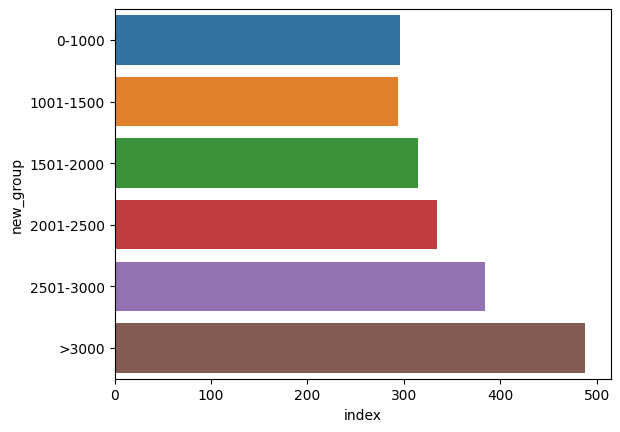

In [357]:
sns.barplot(x='index',y='new_group',data=sal_count_df,
            order = ['0-1000','1001-1500','1501-2000','2001-2500','2501-3000','>3000'],ci=False)

In [360]:
df_with_note = pd.read_csv('data_with_note.csv')

In [361]:
df_with_note = df_with_note[['id','Note']]
df_viz = sal_df_filtered.merge(df_with_note,on='id',how='left')

In [48]:
df_viz = pd.read_csv('data_for_viz.csv')

In [49]:
df_final = df_viz.merge(class_data_df,on='id',how='left')

In [50]:
df_viz_old = df_final[(df_final['Note'] == 'old') & (df_final['new_class'].notna())]

In [51]:
label_ver1 = append_label(class_label, {
                'F1': ['holiday', 'leave', 'days off','inpatient',
                       'outpatient','tet','sickness','new year','maternity','wedding'
                       ,'marriage','lucky money','support personal loan','paternity'],

                'F2': ['salary increase', 'bonus', 'discount',
                       'allowance','13th','t14','14 month','15 month','15th','16 month salary','awarded','compensation','reward','award'],

                'E1': ['course','classes','account','library'],

                'E2': ['review', 'growth', 'career', 'promotion','self-determined','advancement','advancement'],

                'E3': ['training', 'learning', 'seminar', 'workshop','trained','development',
                       'personal development','skill development','orientation','improvement',
                       'support self-development','instructor','improve individual skill'],

                'W1': ['insurance','social insurance', 'health check', 'health insurance',
                       'unemployement', 'health care insurance' , 'medical','pvi care','health talk'],

                'W2': ['food', 'beverage', 'coffee', ' tea ', 'snack','entertainment','happy time','club',
                       'game', 'milktea', 'esport','football','lunch','breakfast','badminton','happy time',
                       'fruit','pantry','swimming','yoga','refreshment','happy hour','drink','pingpong','table tennis',
                       'happy meal','basketball','volleyball','gift','wellness','phone bill','phone sim'],

                'R1': ['appreciation', 'recognization','evaluation','assessment'],

                'R2': ['travel', 'trip', 'party', 'birthday','parties','christmas','picnic',
                       'team building', 'team-building', 'teambuilding', "women's day",
                       'retreat', 'tourism','vacation','color fest','festival','yearend',
                       'year anniversary','festival','founding day','event','bonding','welfare'],

                'R3': ['hybrid','flexible time','work home','remote'],

                'C1': ['family',"happy mom's"],

                'C2': ['childbirth celebration','child'],

                'I1': ['equipment', 'device', 'computer', 'laptop','macbook','access','shuttle bus'],

                'I2': ['facility','gym','yoga center','dormitory support','fitness','playground']
                })
label_ver1

{'F1': ['holiday',
  'leave',
  'days off',
  'inpatient',
  'outpatient',
  'tet',
  'sickness',
  'new year',
  'maternity',
  'wedding',
  'marriage',
  'lucky money',
  'support personal loan',
  'paternity'],
 'F2': ['salary increase',
  'bonus',
  'discount',
  'allowance',
  '13th',
  't14',
  '14 month',
  '15 month',
  '15th',
  '16 month salary',
  'awarded',
  'compensation',
  'reward',
  'award'],
 'E1': ['course', 'classes', 'account', 'library'],
 'E2': ['review',
  'growth',
  'career',
  'promotion',
  'self-determined',
  'advancement'],
 'E3': ['training',
  'learning',
  'seminar',
  'workshop',
  'trained',
  'development',
  'personal development',
  'skill development',
  'orientation',
  'improvement',
  'support self-development',
  'instructor',
  'improve individual skill'],
 'W1': ['insurance',
  'social insurance',
  'health check',
  'health insurance',
  'unemployement',
  'health care insurance',
  'medical',
  'pvi care',
  'health talk'],
 'W2': ['food

In [ ]:
s=df_viz_old.pop('new_class').apply(pd.Series).stack().explode()

df_add=pd.DataFrame({'ben_group':s.index.get_level_values(1),
                      'ben_subgroup':s.values},
                     index=s.index.get_level_values(0))
df_separated = df_viz_old.join(df_add,how='right')

In [ ]:
df_separated_benefit_group = df_separated.merge(class_dict,left_on = 'ben_group',right_on='code',how='left')

#### benefit <> location

In [267]:
df_count_location =  df_separated_benefit_group[['location','benefit_group']]

In [268]:
df_count_location.location = df_count_location.location.str.split(',')                                                               
df_count_location = df_count_location.explode('location')
df_count_location = df_count_location.reset_index()

In [274]:
df_count_location['location_new'] = np.where(df_count_location['location'] == 'ho chi minh','ho chi minh',
                                                np.where(df_count_location['location'] == 'ha noi','ha noi',
                                                         np.where(df_count_location['location'] == 'da nang','da nang','others')))

In [275]:
df_count_location_ben = df_count_location\
.groupby(['location_new','benefit_group'])\
.agg({'benefit_group':'count'})\
.rename({'benefit_group':'count'},axis=1)\
.reset_index()

In [278]:
sorter = ['ha noi','ho chi minh','da nang','others']
df_count_location_ben.sort_values(by="location_new", key=lambda column: column.map(lambda e: sorter.index(e)), inplace=True)

<Axes: xlabel='count', ylabel='location_new'>

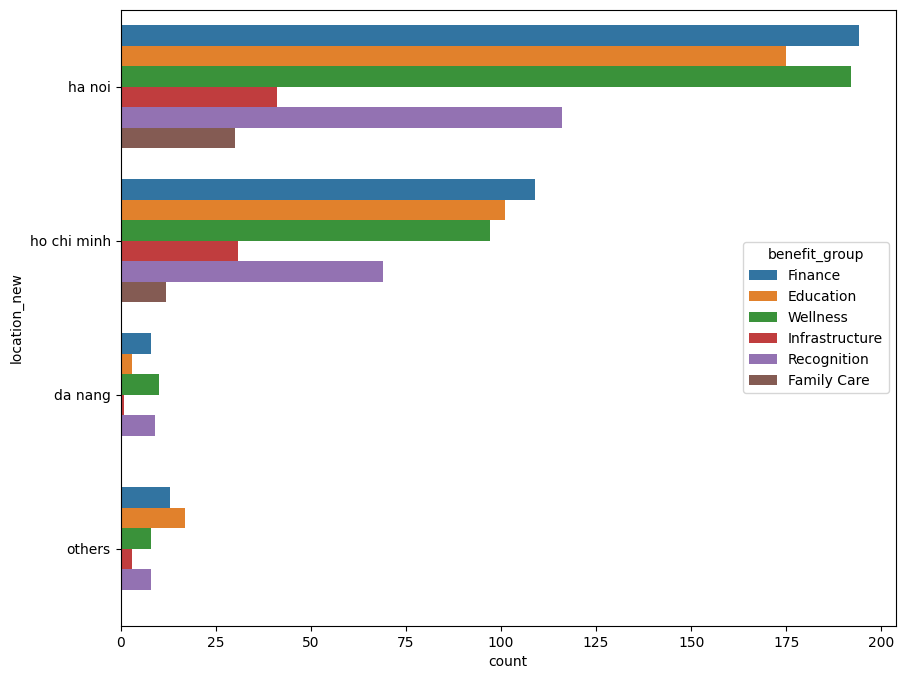

In [279]:
plt.figure(figsize=(10, 8))
sns.barplot(x='count',y='location_new',
            hue = 'benefit_group',
            hue_order = ['Finance','Education','Wellness','Infrastructure','Recognition','Family Care'],
            ci = False,
            data=df_count_location_ben)

#### benefit <> level

In [197]:
df_count_level =  df_separated_benefit_group[['level','year_experience','benefit_group']]

In [198]:
df_count_level.level = df_count_level.level.str.split(',')                                                               
df_count_level = df_count_level.explode('level')
df_count_level.year_experience = df_count_level.year_experience.str.split(',')                                                               
df_count_level = df_count_level.explode('year_experience')
df_count_level = df_count_level.reset_index()

In [199]:
df_count_level.level.unique()

array(['unknown', 'general staff', 'team leader', 'head of department',
       'junior', 'senior', 'fresher'], dtype=object)

In [207]:
df_count_level['year_experience'].unique()

array(['unknown', '3 year', '2 year', '1 year', 'under 1 year', '4 year',
       '5 year'], dtype=object)

In [215]:
pd.set_option('display.max_rows',1287)
df_count_level['level_new'] = np.where((df_count_level['year_experience'] == 'under 1 year') & (df_count_level['level'].isin(['unknown','general staff'])),'fresher',
                                       np.where((df_count_level['year_experience'].isin(['1 year','2 year','3 year'])) & (df_count_level['level'].isin(['unknown','general staff'])),'junior',
                                               np.where((df_count_level['year_experience'].isin(['4 year','5 year'])) & (df_count_level['level'].isin(['unknown','general staff'])),'senior',
                                                        np.where((df_count_level['level'] == 'team leader'),'head of department',df_count_level['level']))))

In [226]:
df_count_exp_ben = df_count_level\
.groupby(['year_experience','benefit_group'])\
.agg({'benefit_group':'count'})\
.rename({'benefit_group':'count'},axis=1)\
.reset_index()

In [233]:
sorter = ["under 1 year","1 year","2 year","3 year","4 year","5 year",'unknown']
df_count_exp_ben.sort_values(by="year_experience", key=lambda column: column.map(lambda e: sorter.index(e)), inplace=True)

<Axes: xlabel='count', ylabel='year_experience'>

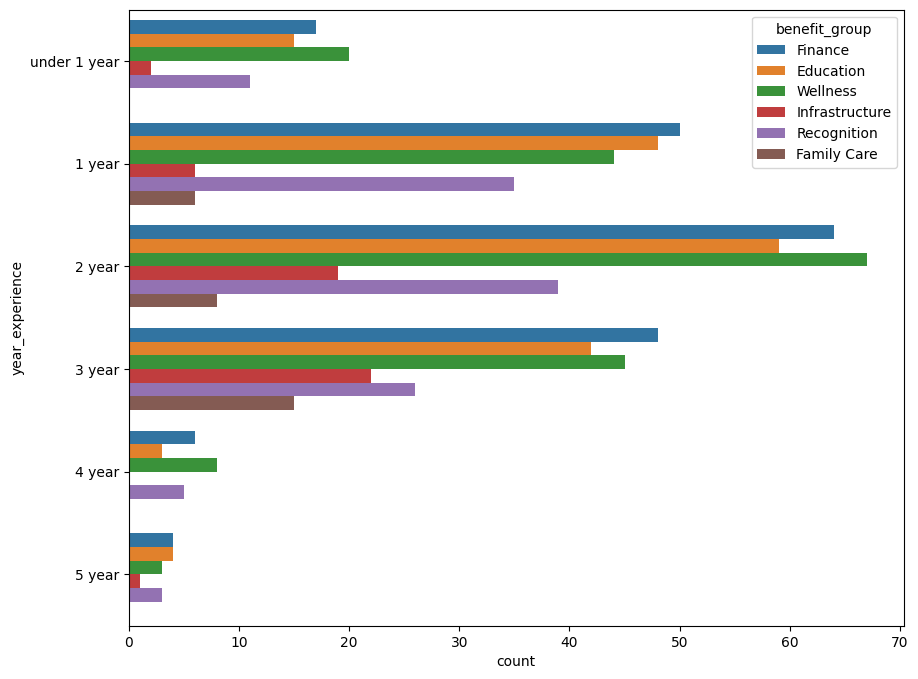

In [234]:
plt.figure(figsize=(10, 8))
sns.barplot(x='count',y='year_experience',
            hue = 'benefit_group',
            hue_order = ['Finance','Education','Wellness','Infrastructure','Recognition','Family Care'],
            ci = False,
            data=df_count_exp_ben[~(df_count_exp_ben['year_experience'] == 'unknown')])

In [216]:
df_count_level_ben = df_count_level\
.groupby(['level_new','benefit_group'])\
.agg({'benefit_group':'count'})\
.rename({'benefit_group':'count'},axis=1)\
.reset_index()

In [222]:
sorter = ['fresher','junior','general staff','senior','head of department','unknown']
df_count_level_ben.sort_values(by="level_new", key=lambda column: column.map(lambda e: sorter.index(e)), inplace=True)

In [223]:
plt.figure(figsize=(10, 8))
sns.barplot(x='count',y='level_new',
            hue = 'benefit_group',
            hue_order = ['Finance','Education','Wellness','Infrastructure','Recognition','Family Care'],
            ci = False,
            data=df_count_level_ben[~(df_count_level_ben['level_new'] == 'unknown')])

<Axes: xlabel='count', ylabel='level_new'>

#### Big Group of benefits

In [ ]:
df_count_ben_group = df_separated_benefit_group\
.groupby(['sub_group','benefit_group'])\
.agg({'benefit_group':'count'})\
.rename({'benefit_group':'count'},axis=1)\
.reset_index()

In [ ]:
sorter = ["Finance","Education",'Wellness','Infrastructure','Recognition','Family Care']
df_count_ben_group.sort_values(by="benefit_group", key=lambda column: column.map(lambda e: sorter.index(e)), inplace=True)

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x='count',y='benefit_group',
            # hue = 'benefit_group',
            # hue_order = ['Finance','Education','Wellness','Infrastructure','Recognition','Family Care'],
            ci = False,
            data=df_count_ben_group)

<Axes: xlabel='count', ylabel='benefit_group'>

In [ ]:
df_ben_group = df_separated_benefit_group['benefit_group'].value_counts().to_frame().reset_index()

In [281]:
plt.figure(figsize=(10, 8))
sns.barplot(x='count',y='benefit_group',
            # hue = 'benefit_group',
            # hue_order = ['Finance','Education','Wellness','Infrastructure','Recognition','Family Care'],
            ci = False,
            data=df_ben_group)
plt.ylabel('benefits')
plt.xlabel('Number of mentions')


Text(0.5, 0, 'Number of mentions')

In [ ]:
df_count_ben_group = df_separated_benefit_group\
                        .groupby(['benefit_group','benefit_y'])\
                        .agg({'benefit_y':'count'})\
                        .rename({'benefit_y':'count'},axis=1)\
                        .reset_index()

In [ ]:
df_count_ben_group.sort_values(by=['count'],ascending = False)

benefit_group                  benefit_y  count
13        Wellness                  Insurance    197
5          Finance  Discounts/rewards/bonuses    185
10     Recognition      Company parties/trips    171
1        Education                   Training    144
6          Finance              Paid time off    127
0        Education                Growth plan     97
12        Wellness             Daily wellness     95
7   Infrastructure          Working equipment     57
2        Education      Tuition reimbursement     39
3      Family Care      Child care assistance     24
8   Infrastructure              Working place     17
4      Family Care   Family planning services     16
9      Recognition      Appreciation programs     14
11     Recognition          Flexible schedule     10

In [ ]:
s=df_viz_old.pop('new_class').apply(pd.Series).stack().explode()

df_add=pd.DataFrame({'ben_group':s.index.get_level_values(1),
                      'ben_subgroup':s.values},
                     index=s.index.get_level_values(0))
df_separated = df_viz_old.join(df_add,how='right')

In [ ]:
df_separated_benefit_group = df_separated.merge(class_dict,left_on = 'ben_group',right_on='code',how='left')

In [ ]:
df_count_ben_group = df_separated_benefit_group\
.groupby(['sub_group','benefit_group'])\
.agg({'benefit_group':'count'})\
.rename({'benefit_group':'count'},axis=1)\
.reset_index()

In [ ]:
sorter = ["Finance","Education",'Wellness','Infrastructure','Recognition','Family Care']
df_count_ben_group.sort_values(by="benefit_group", key=lambda column: column.map(lambda e: sorter.index(e)), inplace=True)

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x='count',y='benefit_group',
            # hue = 'benefit_group',
            # hue_order = ['Finance','Education','Wellness','Infrastructure','Recognition','Family Care'],
            ci = False,
            data=df_count_ben_group)

<Axes: xlabel='count', ylabel='benefit_group'>

In [ ]:
df_ben_group = df_separated_benefit_group['benefit_group'].value_counts().to_frame().reset_index()

<Axes: xlabel='count', ylabel='benefit_group'>

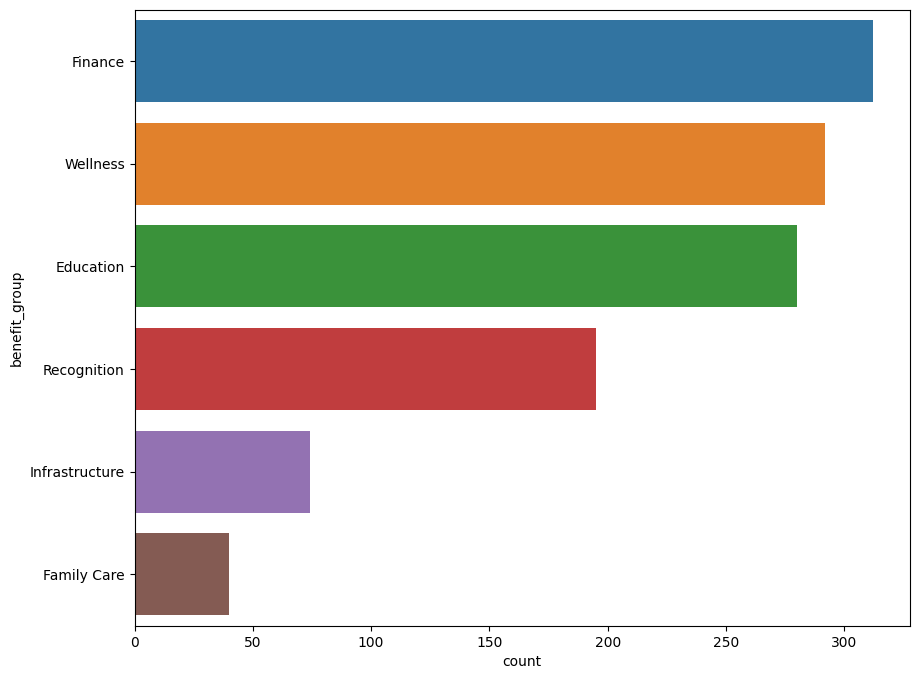

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x='count',y='benefit_group',
            # hue = 'benefit_group',
            # hue_order = ['Finance','Education','Wellness','Infrastructure','Recognition','Family Care'],
            ci = False,
            data=df_ben_group)


In [ ]:
df_count_ben_group = df_separated_benefit_group\
                        .groupby(['benefit_group','benefit_y'])\
                        .agg({'benefit_y':'count'})\
                        .rename({'benefit_y':'count'},axis=1)\
                        .reset_index()

In [ ]:
df_count_ben_group.sort_values(by=['count'],ascending = False)

benefit_group                  benefit_y  count
13        Wellness                  Insurance    197
5          Finance  Discounts/rewards/bonuses    185
10     Recognition      Company parties/trips    171
1        Education                   Training    144
6          Finance              Paid time off    127
0        Education                Growth plan     97
12        Wellness             Daily wellness     95
7   Infrastructure          Working equipment     57
2        Education      Tuition reimbursement     39
3      Family Care      Child care assistance     24
8   Infrastructure              Working place     17
4      Family Care   Family planning services     16
9      Recognition      Appreciation programs     14
11     Recognition          Flexible schedule     10

In [ ]:
s=df_viz_old.pop('new_class').apply(pd.Series).stack().explode()

df_add=pd.DataFrame({'ben_group':s.index.get_level_values(1),
                      'ben_subgroup':s.values},
                     index=s.index.get_level_values(0))
df_separated = df_viz_old.join(df_add,how='right')

In [ ]:
df_separated_benefit_group = df_separated.merge(class_dict,left_on = 'ben_group',right_on='code',how='left')

In [ ]:
df_count_ben_group = df_separated_benefit_group\
.groupby(['sub_group','benefit_group'])\
.agg({'benefit_group':'count'})\
.rename({'benefit_group':'count'},axis=1)\
.reset_index()

In [ ]:
sorter = ["Finance","Education",'Wellness','Infrastructure','Recognition','Family Care']
df_count_ben_group.sort_values(by="benefit_group", key=lambda column: column.map(lambda e: sorter.index(e)), inplace=True)

<Axes: xlabel='count', ylabel='benefit_group'>

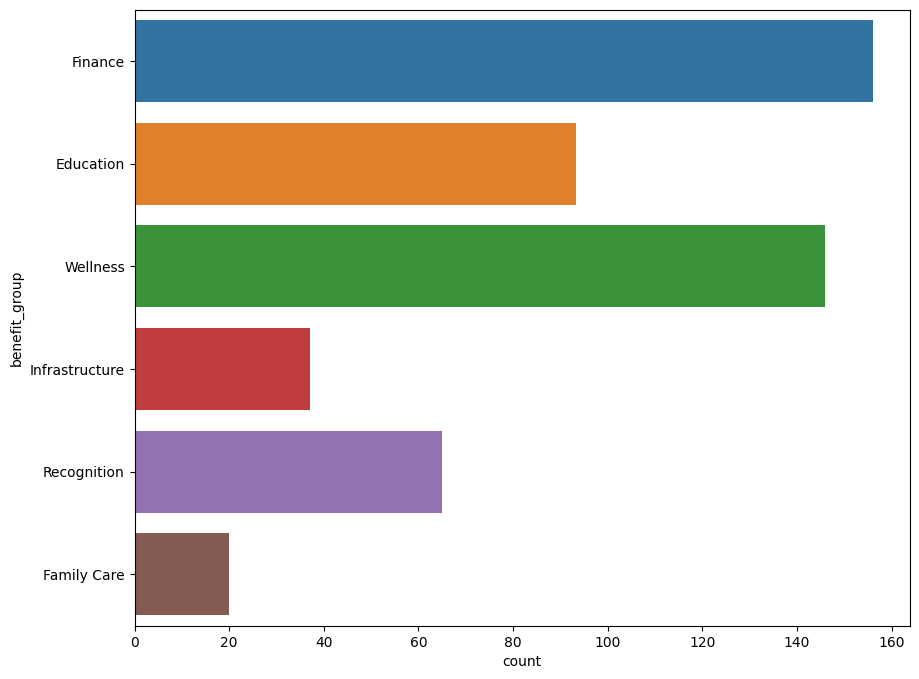

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x='count',y='benefit_group',
            # hue = 'benefit_group',
            # hue_order = ['Finance','Education','Wellness','Infrastructure','Recognition','Family Care'],
            ci = False,
            data=df_count_ben_group)

In [ ]:
df_ben_group = df_separated_benefit_group['benefit_group'].value_counts().to_frame().reset_index()

<Axes: xlabel='count', ylabel='benefit_group'>

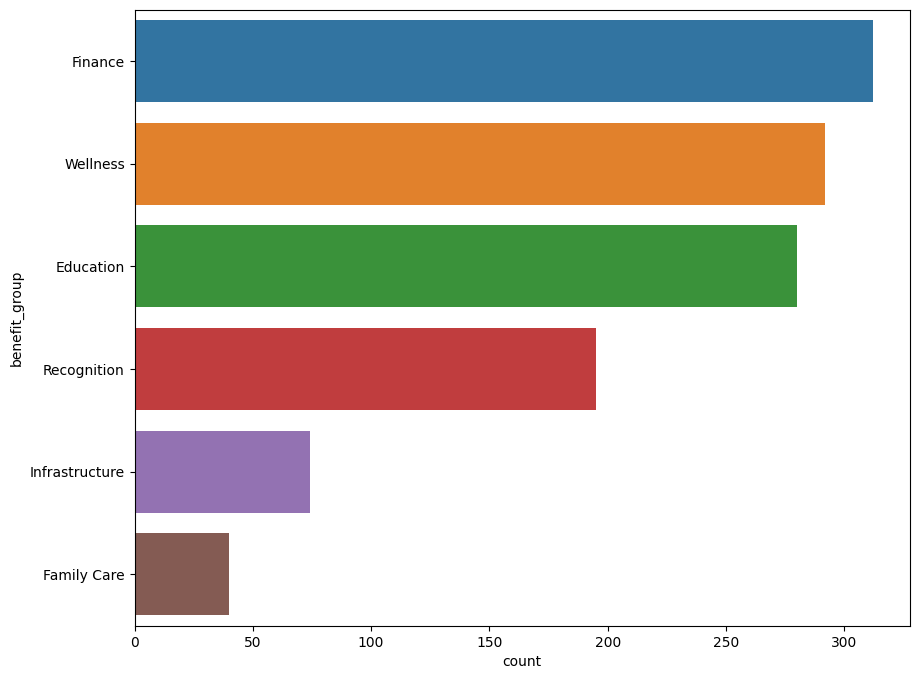

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x='count',y='benefit_group',
            # hue = 'benefit_group',
            # hue_order = ['Finance','Education','Wellness','Infrastructure','Recognition','Family Care'],
            ci = False,
            data=df_ben_group)


In [ ]:
df_count_ben_group = df_separated_benefit_group\
                        .groupby(['benefit_group','benefit_y'])\
                        .agg({'benefit_y':'count'})\
                        .rename({'benefit_y':'count'},axis=1)\
                        .reset_index()

In [ ]:
df_count_ben_group.sort_values(by=['count'],ascending = False)

benefit_group                  benefit_y  count
13        Wellness                  Insurance    197
5          Finance  Discounts/rewards/bonuses    185
10     Recognition      Company parties/trips    171
1        Education                   Training    144
6          Finance              Paid time off    127
0        Education                Growth plan     97
12        Wellness             Daily wellness     95
7   Infrastructure          Working equipment     57
2        Education      Tuition reimbursement     39
3      Family Care      Child care assistance     24
8   Infrastructure              Working place     17
4      Family Care   Family planning services     16
9      Recognition      Appreciation programs     14
11     Recognition          Flexible schedule     10

In [52]:
s=df_viz_old.pop('new_class').apply(pd.Series).stack().explode()

df_add=pd.DataFrame({'ben_group':s.index.get_level_values(1),
                      'ben_subgroup':s.values},
                     index=s.index.get_level_values(0))
df_separated = df_viz_old.join(df_add,how='right')

In [284]:
df_separated_benefit_group = df_separated.merge(class_dict,left_on = 'ben_group',right_on='code',how='left')

In [290]:
df_count_ben_group = df_separated_benefit_group\
.groupby(['sub_group','benefit_group'])\
.agg({'benefit_group':'count'})\
.rename({'benefit_group':'count'},axis=1)\
.reset_index()

In [291]:
sorter = ["BA","DA/BI",'DE','DS/ML/AI']
df_count_ben_group.sort_values(by="sub_group", key=lambda column: column.map(lambda e: sorter.index(e)), inplace=True)

Text(0, 0.5, 'job')

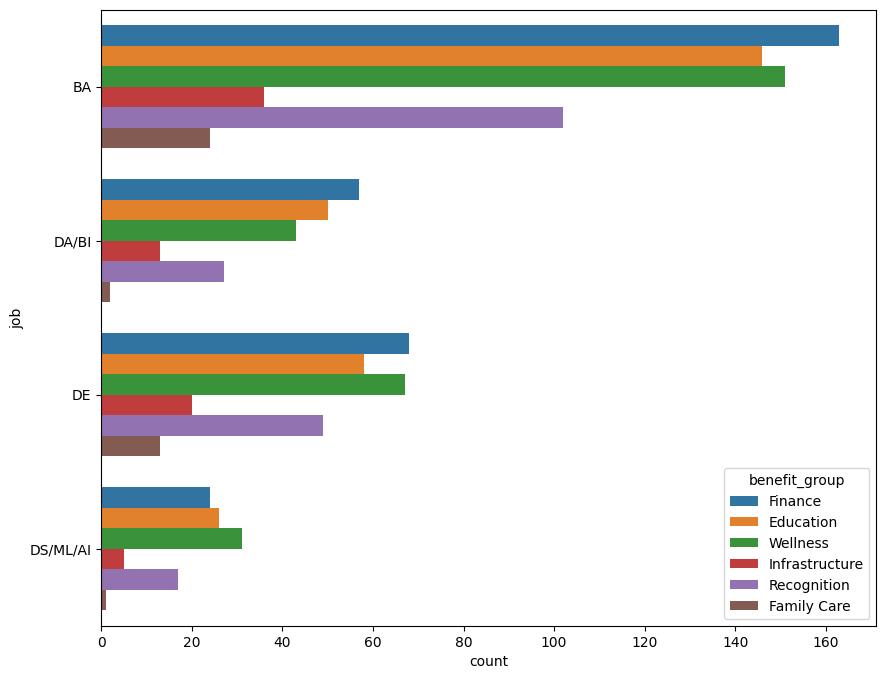

In [294]:
plt.figure(figsize=(10, 8))
sns.barplot(x='count',y='sub_group',
            hue = 'benefit_group',
            hue_order = ['Finance','Education','Wellness','Infrastructure','Recognition','Family Care'],
            ci = False,
            data=df_count_ben_group)
plt.ylabel('job')

In [146]:
df_ben_group = df_separated_benefit_group['benefit_group'].value_counts().to_frame().reset_index()

<Axes: xlabel='count', ylabel='benefit_group'>

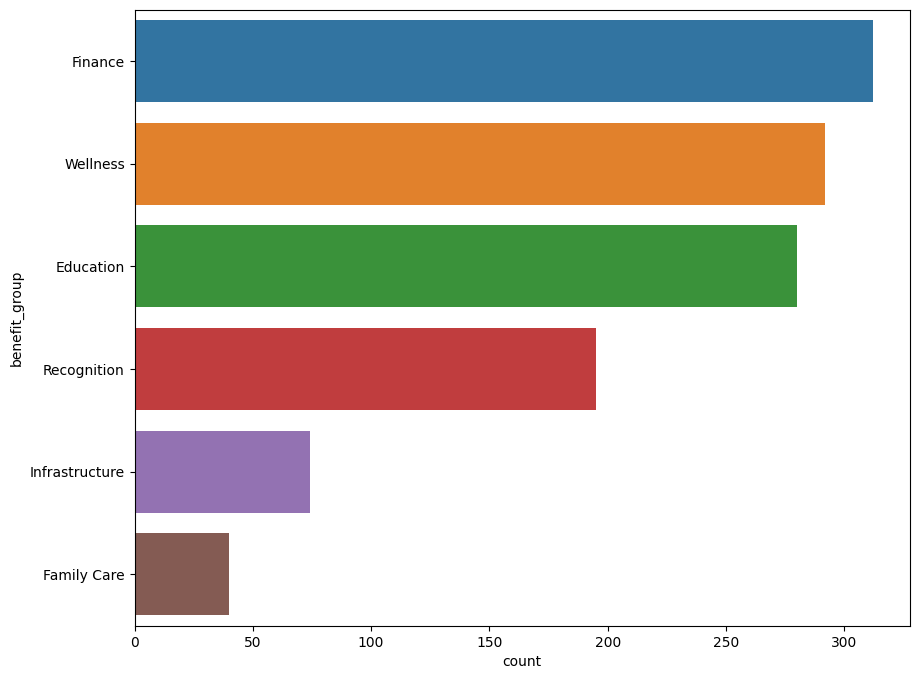

In [148]:
plt.figure(figsize=(10, 8))
sns.barplot(x='count',y='benefit_group',
            # hue = 'benefit_group',
            # hue_order = ['Finance','Education','Wellness','Infrastructure','Recognition','Family Care'],
            ci = False,
            data=df_ben_group)


In [130]:
df_count_ben_group = df_separated_benefit_group\
                        .groupby(['benefit_group','benefit_y'])\
                        .agg({'benefit_y':'count'})\
                        .rename({'benefit_y':'count'},axis=1)\
                        .reset_index()

In [131]:
df_count_ben_group.sort_values(by=['count'],ascending = False)

benefit_group                  benefit_y  count
13        Wellness                  Insurance    197
5          Finance  Discounts/rewards/bonuses    185
10     Recognition      Company parties/trips    171
1        Education                   Training    144
6          Finance              Paid time off    127
0        Education                Growth plan     97
12        Wellness             Daily wellness     95
7   Infrastructure          Working equipment     57
2        Education      Tuition reimbursement     39
3      Family Care      Child care assistance     24
8   Infrastructure              Working place     17
4      Family Care   Family planning services     16
9      Recognition      Appreciation programs     14
11     Recognition          Flexible schedule     10

#### Big Group of salary

In [163]:
sal_title_min = df_separated[df_separated['Min_convert'] > 0]\
            .groupby(["sub_group"])\
            .agg({"Min_convert":'mean'})\
            .reset_index()

In [164]:
sal_title_max = df_separated[df_separated['Max_convert'] < 9999999999]\
            .groupby(["sub_group"])\
            .agg({"Max_convert":'mean'})\
            .reset_index()

In [165]:
sal_title = sal_title_min.merge(sal_title_max,on='sub_group',how='left')

In [169]:
sal_title['Min_convert'] = sal_title['Min_convert'].apply(lambda x: round(x,0))
sal_title['Max_convert'] = sal_title['Max_convert'].apply(lambda x: round(x,0))
sal_title

sub_group  Min_convert  Max_convert
0        BA        943.0       1594.0
1     DA/BI        884.0       1600.0
2        DE       1243.0       1977.0
3  DS/ML/AI       1171.0       2267.0

In [173]:
df_metled = pd.melt(sal_title, id_vars = ['sub_group'], value_vars =['Min_convert', 'Max_convert'])
df_metled

sub_group     variable   value
0        BA  Min_convert   943.0
1     DA/BI  Min_convert   884.0
2        DE  Min_convert  1243.0
3  DS/ML/AI  Min_convert  1171.0
4        BA  Max_convert  1594.0
5     DA/BI  Max_convert  1600.0
6        DE  Max_convert  1977.0
7  DS/ML/AI  Max_convert  2267.0

In [177]:
df_metled['value'] = df_metled['value'].apply(lambda x:round(x,0))
sns.scatterplot(df_metled,x='value',y='sub_group',hue='variable')
for n in df_metled['sub_group']:
  plt.hlines(n, df_metled[(df_metled['sub_group'] == n)&(df_metled['variable'] == 'Min_convert')]['value'], 
             df_metled[(df_metled['sub_group'] == n)&(df_metled['variable'] == 'Max_convert')]['value'],ls='--')
for i in range(df_metled.shape[0]):
      if df_metled['variable'][i] == 'Min_convert':
            plt.text(x=df_metled.value[i]-300,y=df_metled.sub_group[i],s=df_metled.value[i],ha = 'left', va = 'center',
          fontdict=dict(color='red',size=10))
      else: plt.text(x=df_metled.value[i]+50,y=df_metled.sub_group[i],s=df_metled.value[i], ha = 'left', va = 'center',
          fontdict=dict(color='red',size=10))
plt.xlim(0,df_metled['value'].max()+500)
plt.legend(title="Average Salary")
plt.xlabel('Avg Salary')
plt.ylabel('Job')
plt.title('Avg min and max salary each data jobs')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

# LDA

In [40]:
!python3 -m spacy download en_core_web_lg 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.6 MB/s eta 0:00:0000:0100:02
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [41]:
!python3 -m spacy download en_core_web_sm 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 37.6 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [42]:
import re
import logging
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis
import pyLDAvis.gensim
import gensim
import gensim.corpora as corpora

from gensim.models import CoherenceModel, LdaModel
from gensim.utils import simple_preprocess
from gensim.utils import simple_preprocess
from gensim.models.coherencemodel import CoherenceModel
import glob
import spacy
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import pprint


# NLTK Stop words
nltk.download('stopwords')
nltk_stopwords = stopwords.words('english')

# spacy for lemmatization
nlp = spacy.load("en_core_web_sm")

# Set up matplotlib
sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = [10, 6]

[nltk_data] Downloading package stopwords to /Users/vinh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
# Convert the 'PostMessageCleaned' column values from a DataFrame to a list
data = bnf_df_1['benefits_sent_tokens_v6'].values.tolist()

# Define a function to preprocess sentences into words
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

# Apply the function to convert the sentences into lists of words
data_words = list(sent_to_words(data))

data_words

[['months', 'bonus', 'year'],
 ['bao', 'viet', 'premium', 'health', 'care', 'insurance'],
 ['benefits', 'you', 'th', 'month', 'salary'],
 ['benefits', 'you', 'th', 'month', 'salary'],
 ['annual', 'bonus', 'upto', 'months', 'salary', 'health', 'insurance'],
 ['bonus', 'scheme', 'training', 'salary', 'increase'],
 ['preferred', 'skills', 'qualifications', 'experience'],
 ['benefits',
  'th',
  'month',
  'salary',
  'annual',
  'travel',
  'lunch',
  'allowance'],
 ['benefits',
  'th',
  'month',
  'salary',
  'annual',
  'travel',
  'lunch',
  'allowance'],
 ['cac',
  'phuc',
  'loi',
  'danh',
  'cho',
  'ban',
  'net',
  'salary',
  'performance',
  'bonus'],
 ['cac',
  'phuc',
  'loi',
  'danh',
  'cho',
  'ban',
  'net',
  'salary',
  'performance',
  'bonus'],
 ['income',
  'months',
  'year',
  'laptop',
  'equipment',
  'employees',
  'free',
  'canteen'],
 ['cac',
  'phuc',
  'loi',
  'danh',
  'cho',
  'ban',
  'net',
  'salary',
  'nperformance',
  'bonus'],
 ['insurance', 'tr

In [44]:
# Download the stopwords corpus from NLTK
nltk.download('stopwords')

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'VERB']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

[nltk_data] Downloading package stopwords to /Users/vinh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
# NLTK Stop words
stop_words = stopwords.words('english')
stop_words.extend(['from', 're', 'com'])
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

In [46]:
# Example
print(data_words_nostops[113])

['benefits', 'enjoy', 'full', 'social', 'welfare', 'regimes', 'health', 'insurance', 'social', 'insurance', 'unemployment', 'insurance', 'according', 'provisions', 'law', 'opportunities', 'receive', 'training', 'improve', 'professional', 'skills', 'dynamic', 'working', 'environment', 'professional']


In [47]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm')
data_words_bigrams = data_words_nostops
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'VERB'])
# Example
print(data_lemmatized[113])

['benefit', 'enjoy', 'welfare', 'regime', 'health', 'insurance', 'insurance', 'unemployment', 'insurance', 'accord', 'provision', 'law', 'opportunity', 'receive', 'training', 'improve', 'skill', 'work', 'environment']


In [48]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1)]]


In [49]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('bonus', 1), ('month', 1), ('year', 1)]]

In [50]:
# Run the final LDA model with the specified parameters
lda_model_final = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                  id2word=id2word,
                                                  num_topics=12,
                                                  random_state=100,
                                                  chunksize=400,
                                                  passes=30,
                                                  alpha= 0.31,
                                                  eta= 0.91,
                                                  per_word_topics=True)

# Calculate the coherence score for the final LDA model
coherence_model_lda = CoherenceModel(model=lda_model_final, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

# Print the coherence score
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5429484423837068


In [51]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model_final.print_topics())
doc_lda = lda_model_final[corpus]

[(0,
  '0.013*"opportunity" + 0.010*"compensation" + 0.009*"offer" + '
  '0.008*"ecommerce" + 0.008*"include" + 0.007*"growth" + 0.007*"leader" + '
  '0.007*"lead" + 0.007*"training" + 0.005*"role"'),
 (1,
  '0.010*"environment" + 0.009*"learn" + 0.008*"work" + 0.008*"provide" + '
  '0.008*"company" + 0.008*"experience" + 0.007*"product" + 0.006*"place" + '
  '0.006*"chance" + 0.006*"user"'),
 (2,
  '0.011*"meal" + 0.006*"pm" + 0.006*"monday" + 0.006*"refreshment" + '
  '0.006*"negotiate" + 0.005*"information" + 0.005*"plan" + 0.005*"chance" + '
  '0.004*"break" + 0.004*"pace"'),
 (3,
  '0.047*"salary" + 0.045*"work" + 0.033*"year" + 0.023*"company" + '
  '0.020*"month" + 0.017*"performance" + 0.016*"training" + 0.015*"employee" + '
  '0.015*"benefit" + 0.015*"base"'),
 (4,
  '0.001*"vinfast" + 0.001*"vinschool" + 0.001*"vinmec" + 0.001*"vingroup" + '
  '0.001*"vinhm" + 0.001*"sponsor" + 0.001*"emulation" + 0.001*"shift" + '
  '0.001*"certification" + 0.001*"expense"'),
 (5,
  '0.029*"

In [52]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_final.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_final, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.145342976175854

Coherence Score:  0.5429484423837068


In [53]:
def format_topics_sentences(ldamodel=lda_model_final, corpus=corpus, texts=data):
    # Init output
    sent_topics = []

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics.append([int(topic_num), round(prop_topic, 4), topic_keywords])
                break

    # Create DataFrame
    sent_topics_df = pd.DataFrame(sent_topics, columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return sent_topics_df


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model_final, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.sort_values('Dominant_Topic')

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
419          419               0              0.5323   
405          405               0              0.7299   
83            83               0              0.4764   
84            84               0              0.4764   
411          411               0              0.4881   
..           ...             ...                 ...   
448          448              11              0.9666   
446          446              11              0.7472   
132          132              11              0.4944   
308          308              11              0.7834   
443          443              11              0.5080   

                                              Keywords  \
419  opportunity, compensation, offer, ecommerce, i...   
405  opportunity, compensation, offer, ecommerce, i...   
83   opportunity, compensation, offer, ecommerce, i...   
84   opportunity, compensation, offer, ecommerce, i...   
411  opportunity, compensation, offer, ecommerce, i...   
..                                                 ...   
448  work, day, opportunity, bonus, leave, company,...   
446  work, day, opportunity, bonus, leave, company,...   
132  work, day, opportunity, bonus, leave, company,...   
308  work, day, opportunity, bonus, leave, company,...   
443  work, day, opportunity, bonus, leave, company,...   

                                                  Text  
419  [['lizai offers opportunities career growth co...  
405  [offer excellent competitive salary package im...  
83   [benefits: gross salary: 9m ,  10 candidates l...  
84   [benefits: gross salary: 9m ,  10 candidates l...  
411  [participate key digitalization projects inves...  
..                                                 ...  
448  [benefits professional,  creative working envi...  
446  [1. opportunities personal development ,  work...  
132  [13th month bonus + private medical insurance ...  
308  [quyền lợi: ,  successful candidates part frie...  
443  [ working hours: 8:30 a.m. ,  5:30 p.m. monday...  

[464 rows x 5 columns]

In [54]:
data_lemmatized

[['month', 'bonus', 'year'],
 ['care', 'insurance'],
 ['benefit', 'month', 'salary'],
 ['benefit', 'month', 'salary'],
 ['bonus', 'upto', 'month', 'salary', 'health', 'insurance'],
 ['bonus', 'scheme', 'training', 'salary', 'increase'],
 ['prefer', 'skill', 'qualification', 'experience'],
 ['benefit', 'month', 'salary', 'travel', 'lunch', 'allowance'],
 ['benefit', 'month', 'salary', 'travel', 'lunch', 'allowance'],
 ['salary', 'performance', 'bonus'],
 ['salary', 'performance', 'bonus'],
 ['income', 'month', 'year', 'laptop', 'equipment', 'employee', 'canteen'],
 ['salary', 'nperformance', 'bonus'],
 ['insurance', 'travel', 'uniform', 'bonus', 'training', 'leave'],
 ['salary', 'bonus', 'annual', 'pay', 'care'],
 ['month', 'salary', 'insurance'],
 ['insurance', 'travel', 'health', 'care', 'training', 'salary', 'increase'],
 ['insurance', 'travel', 'health', 'care', 'training', 'salary', 'increase'],
 ['month', 'salary', 'health', 'care', 'company', 'trip'],
 ['insurance', 'travel', 'he

In [55]:
all_words = [word for sublist in data_lemmatized for word in sublist]

In [56]:
all_words

['month',
 'bonus',
 'year',
 'care',
 'insurance',
 'benefit',
 'month',
 'salary',
 'benefit',
 'month',
 'salary',
 'bonus',
 'upto',
 'month',
 'salary',
 'health',
 'insurance',
 'bonus',
 'scheme',
 'training',
 'salary',
 'increase',
 'prefer',
 'skill',
 'qualification',
 'experience',
 'benefit',
 'month',
 'salary',
 'travel',
 'lunch',
 'allowance',
 'benefit',
 'month',
 'salary',
 'travel',
 'lunch',
 'allowance',
 'salary',
 'performance',
 'bonus',
 'salary',
 'performance',
 'bonus',
 'income',
 'month',
 'year',
 'laptop',
 'equipment',
 'employee',
 'canteen',
 'salary',
 'nperformance',
 'bonus',
 'insurance',
 'travel',
 'uniform',
 'bonus',
 'training',
 'leave',
 'salary',
 'bonus',
 'annual',
 'pay',
 'care',
 'month',
 'salary',
 'insurance',
 'insurance',
 'travel',
 'health',
 'care',
 'training',
 'salary',
 'increase',
 'insurance',
 'travel',
 'health',
 'care',
 'training',
 'salary',
 'increase',
 'month',
 'salary',
 'health',
 'care',
 'company',
 'trip

In [57]:
word_count = {}

for word in all_words:
    if word in word_count:
        word_count[word] += 1
    else:
        word_count[word] = 1

In [58]:
sorted_word_count = dict(sorted(word_count.items(), key=lambda item: item[1], reverse=True))
sorted_word_count

{'salary': 753,
 'insurance': 578,
 'work': 542,
 'year': 458,
 'bonus': 378,
 'month': 375,
 'health': 336,
 'benefit': 321,
 'company': 319,
 'training': 254,
 'environment': 241,
 'day': 238,
 'employee': 231,
 'leave': 230,
 'opportunity': 229,
 'accord': 221,
 'team': 201,
 'travel': 184,
 'activity': 168,
 'holiday': 138,
 'skill': 136,
 'time': 136,
 'base': 134,
 'participate': 131,
 'increase': 130,
 'performance': 121,
 'allowance': 120,
 'development': 118,
 'hour': 118,
 'care': 114,
 'pay': 109,
 'build': 104,
 'working': 102,
 'birthday': 100,
 'review': 100,
 'policy': 99,
 'law': 99,
 'project': 98,
 'course': 89,
 'vacation': 88,
 'regulation': 88,
 'club': 86,
 'trip': 80,
 'check': 79,
 'provide': 78,
 'teambuilding': 77,
 'lunch': 76,
 'labor': 76,
 'enjoy': 76,
 'experience': 75,
 'package': 73,
 'unemployment': 73,
 'support': 72,
 'regime': 70,
 'technology': 70,
 'income': 67,
 'learn': 66,
 'career': 62,
 'ability': 61,
 'capacity': 60,
 'develop': 59,
 'sport'